In [48]:
# SETTING THINGS UP
#------------------------------

# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Configure Jupyter notebook to show all outputs from cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [49]:
# Import csvs
mouse_df=pd.read_csv("Resources/mouse_drug_data.csv")
trial_df=pd.read_csv("Resources/clinicaltrial_data.csv")

In [50]:
# Join the tables to create full dataframe
full_df=pd.merge(mouse_df, trial_df, on='Mouse ID', how='outer') # Perform outer join to make sure all rows are accounted for
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [51]:
# RUN TESTS ON FULL DATAFRAME TO MAKE SURE DATA IS CLEAN AND READY TO USE
#----------------------------------------------------------------------------

# Test dataframe data to make sure nothing weird is going on that I can't see.
# This cell will be fully commented out at the end.

# Test there are no NaN values in dataframe
# full_df.isnull().sum() # This returns 0 for all columns, so there are no NaN values

# Test what treatment types are in the dataframe
# full_df['Drug'].unique() # This returns 10 different treatments but I only care about 4 of them. Define function below to filter based on each relevant treatment.

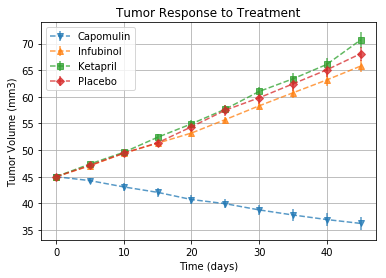

In [74]:
# SCATTERPLOT FOR AVERAGE TUMOR VOLUME FOR EACH TREATMENT VS. TIME 
#-------------------------------------------------------------------

    # Step A: Create array of time values
    # Step B: Define a function that takes a treatment name as an input and outputs a scatterplot with error bars
        # Step B.1: Filter the dataframe to only have rows using a specific drug
        # Step B.2: Calculate mean of tumor volume size for the specific drug at each timepoint
        # Step B.3: Calculate sem (standard error of mean) of tumor volume size for the specific drug at each timepoint
        # Step B.4: Plot the coordinate pairs (Timepoint, Tumor Volume (mm3)) on a scatter plot
    # Step C: Call the function for the right treatments and apply final labels as appropriate
    
# Step A: Create array of time values (which will be our x-axis values)

min_x=full_df['Timepoint'].min()
max_x=full_df['Timepoint'].max()
step=5
    
times=np.arange(min_x, max_x+step, step)

# Step B: Define a function that takes a treatment name and scatterplot marker as an input and outputs a scatterplot with error bars

def treatment(drug, marker):

    # Step B.1: Filter the dataframe to only have rows using a specific drug
    drug_bool=full_df['Drug']==drug # Define boolean that is true if the value in the drug column matches specific drug
    drug_df=full_df[drug_bool] # Define a new filtered dataframe based on this boolean

    # Step B.2: Calculate mean of tumor volume size for the specific drug at each timepoint
    means=drug_df.groupby('Timepoint').mean()['Tumor Volume (mm3)'] # Create series indexed by timepoints with mean tumor volume as elements
    means=means.values # Creates array based on series

    # Step B.3: Calculate sem (standard error of mean) of tumor volume size for the specific drug at each timepoint
    se_means=drug_df.groupby('Timepoint').sem()['Tumor Volume (mm3)'] # Create series indexed by timepoints with sem's as elements
    se_means=se_means.values # Creates array based on series
    
    # Step B.4: Plot the coordinate pairs (Timepoint, Tumor Volume (mm3)) on a scatter plot
    plt.errorbar(times, means, yerr=se_means, fmt=marker, alpha=0.75)
    plt.title('Tumor Response to Treatment')
    plt.xlabel('Time (days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.grid(True)
    treatments=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
    plt.legend(treatments)
    
# Step C: Call the function for the right treatments and apply final labels as appropriate

# Define list of markers we care about
markers=['v--', '^--', 's--', 'D--']

# Define for loop to call the function 4 times
for i in range(len(treatments)):
    treatment(treatments[i], markers[i])

plt.show()

In [ ]:
# SCATTERPLOT FOR NUMBER OF METASTATIC (CANCER SPREADING) SITES FOR EACH TREATMENT VS. TIME 
#----------------------------------------------------------------------------------------------

